<a href="https://colab.research.google.com/github/Marwenboughanmi/EVS-project-1/blob/main/percent_EVs_vs_Oil_Cunsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries and files

In [ ]:
# Install the required libraries
!pip install prophet

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import files that we'll be using
from google.colab import files
# Import share-car-stocks-electric.csv
ev_data_file = files.upload()
# Import energy-consumption-by-source-and-country.csv
oil_consumption_file = files.upload()
# Import API_SP.POP.TOTL_DS2_en_csv_v2_31753 - API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv
pop_data=files.upload()

Saving share-car-stocks-electric.csv to share-car-stocks-electric.csv


Saving energy-consumption-by-source-and-country.csv to energy-consumption-by-source-and-country.csv


Saving API_SP.POP.TOTL_DS2_en_csv_v2_31753 - API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv to API_SP.POP.TOTL_DS2_en_csv_v2_31753 - API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv


# Find the Top Five and Bottom Five Countries with the Highest Percentages of Electric Vehicles

In [3]:
# Create a data frame from the ev data
ev_df = pd.read_csv("share-car-stocks-electric.csv")
ev_df = ev_df.set_index('Year')
ev_df=ev_df.rename(columns={'Share of car stocks that are electric':'% of Cars that are EVs', 'Entity': 'Country'})
del ev_df['Code']

# Remove entities that are not countries
ev_df = ev_df[ev_df['Country'] != 'Rest of World']
ev_df = ev_df[ev_df['Country'] != 'World']

# Display the ev dataframe
display(ev_df.head())
display(ev_df.tail())

,Country,% of Cars that are EVs
Year,,
2011,Australia,0.00039
2012,Australia,0.00240
2013,Australia,0.00460
2014,Australia,0.01400
2015,Australia,0.02700


,Country,% of Cars that are EVs
Year,,
2019,United States,0.62
2020,United States,0.77
2021,United States,0.95
2022,United States,1.30
2023,United States,2.10


In [4]:
ev_data_2023 = ev_df.loc[ev_df.index == 2023]
ev_data_2023 = ev_data_2023.sort_values(by=['% of Cars that are EVs'], ascending=False)
display(ev_data_2023.head())
display(ev_data_2023.tail())# Find the countries with the highest percentage of EVs in the most recent available year
ev_data_2023 = ev_df.loc[ev_df.index == 2023]
ev_data_2023 = ev_data_2023.sort_values(by=['% of Cars that are EVs'], ascending=False)
display(ev_data_2023.head())
display(ev_data_2023.tail())

,Country,% of Cars that are EVs
Year,,
2023,Norway,29.0
2023,Iceland,18.0
2023,Denmark,11.0
2023,Sweden,11.0
2023,Netherlands,8.3


,Country,% of Cars that are EVs
Year,,
2023,India,0.310
2023,Brazil,0.210
2023,Mexico,0.140
2023,Chile,0.087
2023,South Africa,0.044


,Country,% of Cars that are EVs
Year,,
2023,Norway,29.0
2023,Iceland,18.0
2023,Denmark,11.0
2023,Sweden,11.0
2023,Netherlands,8.3


,Country,% of Cars that are EVs
Year,,
2023,India,0.310
2023,Brazil,0.210
2023,Mexico,0.140
2023,Chile,0.087
2023,South Africa,0.044


['Norway', 'Iceland', 'Denmark', 'Sweden', 'Netherlands']


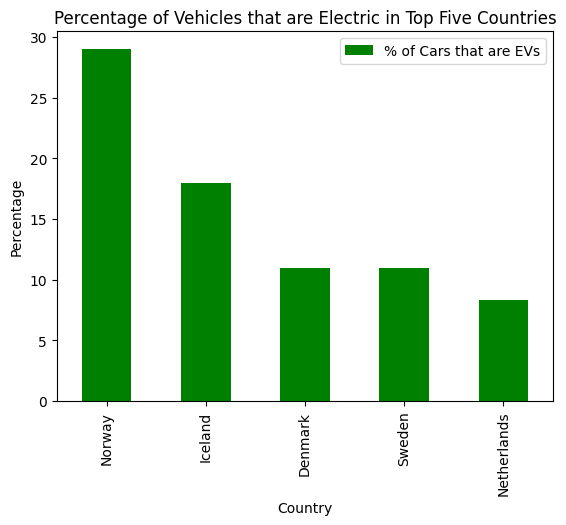

In [5]:
# Create a list and a bar graph of the top 5 Countries
top_5_countries = ev_data_2023.head()
top_5_country_list = top_5_countries['Country'].tolist()

print(top_5_country_list)

top_5_countries.plot(kind='bar',
                     x='Country', y='% of Cars that are EVs',
                     title='Percentage of Vehicles that are Electric in Top Five Countries',
                     ylabel='Percentage',
                     color ='g')
plt.show()

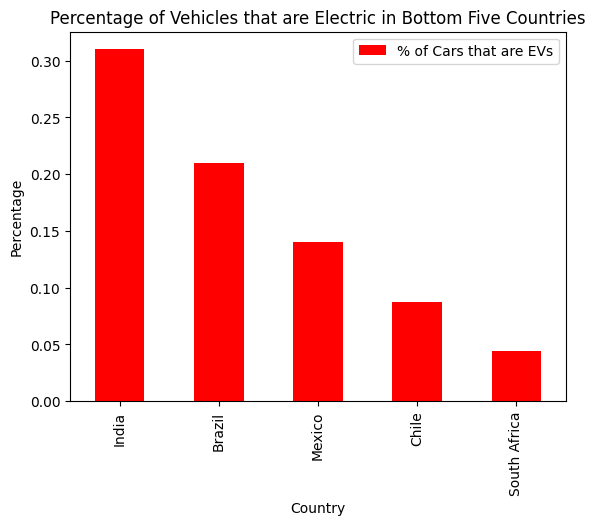

In [8]:
# Create a list and a bar graph of the bottom 5 Countries
bottom_5_countries = ev_data_2023.tail()
bottom_5_country_list = bottom_5_countries['Country'].tolist()


bottom_5_countries.plot(kind='bar',
                     x='Country', y='% of Cars that are EVs',
                     title='Percentage of Vehicles that are Electric in Bottom Five Countries',
                     ylabel='Percentage',
                     color ='r')
plt.show()

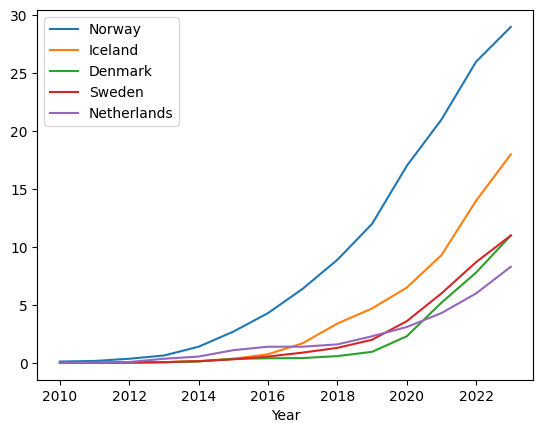

In [9]:
# Plotting the top 5 countries with the highest percentage of EV's
fig, ax = plt.subplots()

ev_df.loc[ev_df['Country']=='Norway']['% of Cars that are EVs'].plot(ax=ax, label="Norway")
ev_df.loc[ev_df['Country']=='Iceland']['% of Cars that are EVs'].plot(ax=ax, label='Iceland')
ev_df.loc[ev_df['Country']=='Denmark']['% of Cars that are EVs'].plot(ax=ax, label='Denmark')
ev_df.loc[ev_df['Country']=='Sweden']['% of Cars that are EVs'].plot(ax=ax, label='Sweden')
ev_df.loc[ev_df['Country']=='Netherlands']['% of Cars that are EVs'].plot(ax=ax, label='Netherlands')

plt.legend(loc='best')
plt.show()

In [12]:
# Loading the global population dataset from a CSV file
pop_df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_31753 - API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv")

# Selecting columns for 'Country Name' and population data from 2010 to 2023
pop_df=pop_df[['Country Name']+[str(year) for year in range(2010, 2024)]]
pop_df=pop_df.rename(columns={'Country Name': 'Country'})
pop_df


,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,523459657.0,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,1792563.0,1799338.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1768086.0,1756374.0
262,"Yemen, Rep.",24743946.0,25475610.0,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,34449825.0
263,South Africa,51784921.0,52443325.0,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,60414495.0
264,Zambia,13792086.0,14265814.0,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20569737.0


In [13]:
# Melting the population DataFrame to transform from dataframe to switch the years to rows
df_melted= pd.melt(pop_df, id_vars=['Country'], var_name='Year', value_name='Population')

# Setting 'Year' as the index for easier data manipulation and analysis
df_melted.set_index('Year', inplace=True)
df_melted

,Country,Population
Year,,
2010,Aruba,100341.0
2010,Africa Eastern and Southern,523459657.0
2010,Afghanistan,28189672.0
2010,Africa Western and Central,356337762.0
2010,Angola,23364185.0
...,...,...
2023,Kosovo,1756374.0
2023,"Yemen, Rep.",34449825.0
2023,South Africa,60414495.0


# Merge Motor Gasoline Data With EV Data

In [14]:
# Create a data frame for the oil consumption data
oil_con_df = pd.read_csv("energy-consumption-by-source-and-country.csv")
oil_con_df = oil_con_df.set_index('Year')
oil_con_df=oil_con_df.rename(columns={'Entity': 'Country'})

# isolate oil column
oil_con_df = oil_con_df[['Country','Oil consumption - TWh']]

# Set up data in oil_con_df to match ev_df
display(oil_con_df.head())
display(oil_con_df.tail())


,Country,Oil consumption - TWh
Year,,
1971,Africa,474.30540
1972,Africa,510.72960
1973,Africa,549.80396
1974,Africa,569.73850
1975,Africa,597.67100


,Country,Oil consumption - TWh
Year,,
2019,Zimbabwe,NaN
2020,Zimbabwe,NaN
2021,Zimbabwe,NaN
2022,Zimbabwe,NaN
2023,Zimbabwe,NaN


In [15]:
# Merging the electric vehicle DataFrame (ev_df) with the oil consumption DataFrame (oil_con_df)
# The merge is performed on the 'Country' and 'Year' columns using an inner join to retain only matching records
merged_df = pd.merge(ev_df, oil_con_df, on=['Country', 'Year'], how='inner')

# Converting the index of the merged DataFrame to a datetime format for better time series handling
merged_df.index = pd.to_datetime(merged_df.index, format='%Y')
df_melted.index = pd.to_datetime(df_melted.index, format='%Y')

In [16]:
# merge the dfs
merged_df= pd.merge(merged_df,df_melted, on=['Country', 'Year'], how='inner')


# display the merged df
display(merged_df.head())
display(merged_df.tail())

,Country,% of Cars that are EVs,Oil consumption - TWh,Population
Year,,,,
2011-01-01,Australia,0.00039,547.06030,22340024.0
2012-01-01,Australia,0.00240,561.41907,22733465.0
2013-01-01,Australia,0.00460,578.03705,23128129.0
2014-01-01,Australia,0.01400,575.42820,23475686.0
2015-01-01,Australia,0.02700,570.29706,23815995.0


,Country,% of Cars that are EVs,Oil consumption - TWh,Population
Year,,,,
2019-01-01,United States,0.62,10287.683,328329953.0
2020-01-01,United States,0.77,9035.320,331526933.0
2021-01-01,United States,0.95,9868.985,332048977.0
2022-01-01,United States,1.30,9930.587,333271411.0
2023-01-01,United States,2.10,9960.662,334914895.0


In [17]:
# Calculating the Oil Consumption Per Capita
merged_df['Oil Consumption Per Capita'] = merged_df['Oil consumption - TWh'] / merged_df['Population']
merged_df

,Country,% of Cars that are EVs,Oil consumption - TWh,Population,Oil Consumption Per Capita
Year,,,,,
2011-01-01,Australia,0.00039,547.06030,22340024.0,0.000024
2012-01-01,Australia,0.00240,561.41907,22733465.0,0.000025
2013-01-01,Australia,0.00460,578.03705,23128129.0,0.000025
2014-01-01,Australia,0.01400,575.42820,23475686.0,0.000025
2015-01-01,Australia,0.02700,570.29706,23815995.0,0.000024
...,...,...,...,...,...
2019-01-01,United States,0.62000,10287.68300,328329953.0,0.000031
2020-01-01,United States,0.77000,9035.32000,331526933.0,0.000027
2021-01-01,United States,0.95000,9868.98500,332048977.0,0.000030


# Look For Trends Between Oil Consumption and Percentage of Vehicles that are Electric

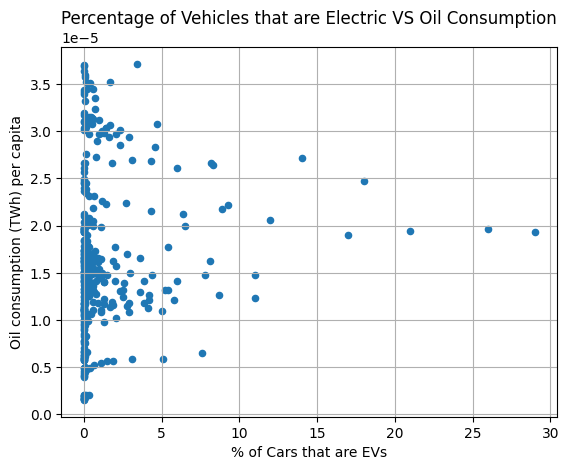

In [18]:
# Creating a scatter plot to visualize the relationship between the percentage of electric vehicles and oil consumption per capita
fig, ax = plt.subplots()

merged_df.plot(kind='scatter', ax=ax, x='% of Cars that are EVs', y='Oil Consumption Per Capita', title = 'Percentage of Vehicles that are Electric VS Oil Consumption' )
plt.grid()
plt.ylabel('Oil consumption (TWh) per capita')
plt.xlabel('% of Cars that are EVs')
plt.show()

In [19]:
# Calculating the data's correlation between the two variables
merged_df[['% of Cars that are EVs','Oil consumption - TWh']].corr()

,% of Cars that are EVs,Oil consumption - TWh
% of Cars that are EVs,1.000000,-0.072551
Oil consumption - TWh,-0.072551,1.000000


plot for top top 5 and bottom 5 countries by % of ev's

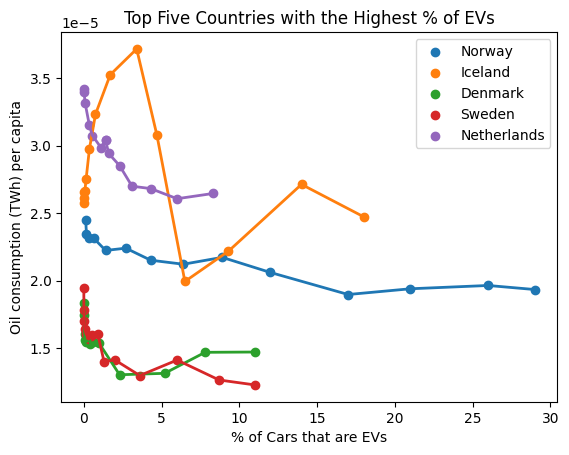

In [20]:
# Creating a scatter plot to visualize the relationship between the percentage of electric vehicles and oil consumption per capita for selected countries
fig, ax = plt.subplots()

# Extracting EV percentages for the top five countries with the highest EV adoption
norway = merged_df.loc[merged_df['Country']=='Norway']['% of Cars that are EVs']
iceland = merged_df.loc[merged_df['Country']=='Iceland']['% of Cars that are EVs']
denmark = merged_df.loc[merged_df['Country']=='Denmark']['% of Cars that are EVs']
sweden = merged_df.loc[merged_df['Country']=='Sweden']['% of Cars that are EVs']
netherlands = merged_df.loc[merged_df['Country']=='Netherlands']['% of Cars that are EVs']

# Plotting scatter points for each country based on their EV percentage and oil consumption per capita
plt.scatter(norway, merged_df.loc[merged_df['Country']=='Norway']['Oil Consumption Per Capita'], label = 'Norway')
plt.scatter(iceland, merged_df.loc[merged_df['Country']=='Iceland']['Oil Consumption Per Capita'], label = 'Iceland')
plt.scatter(denmark, merged_df.loc[merged_df['Country']=='Denmark']['Oil Consumption Per Capita'], label ='Denmark')
plt.scatter(sweden, merged_df.loc[merged_df['Country']=='Sweden']['Oil Consumption Per Capita'], label = 'Sweden')
plt.scatter(netherlands, merged_df.loc[merged_df['Country']=='Netherlands']['Oil Consumption Per Capita'], label = 'Netherlands')

# Plotting scatter points for each country based on their EV percentage and oil consumption per capita
plt.plot(norway, merged_df.loc[merged_df['Country']=='Norway']['Oil Consumption Per Capita'], linewidth=2)
plt.plot(iceland, merged_df.loc[merged_df['Country']=='Iceland']['Oil Consumption Per Capita'], linewidth=2)
plt.plot(denmark, merged_df.loc[merged_df['Country']=='Denmark']['Oil Consumption Per Capita'], linewidth=2)
plt.plot(sweden, merged_df.loc[merged_df['Country']=='Sweden']['Oil Consumption Per Capita'],linewidth=2)
plt.plot(netherlands, merged_df.loc[merged_df['Country']=='Netherlands']['Oil Consumption Per Capita'], linewidth=2)

# Setting labels and title for the plot
plt.legend(loc='best')
plt.xlabel('% of Cars that are EVs')
plt.ylabel('Oil consumption (TWh) per capita')
plt.title('Top Five Countries with the Highest % of EVs')
plt.show()

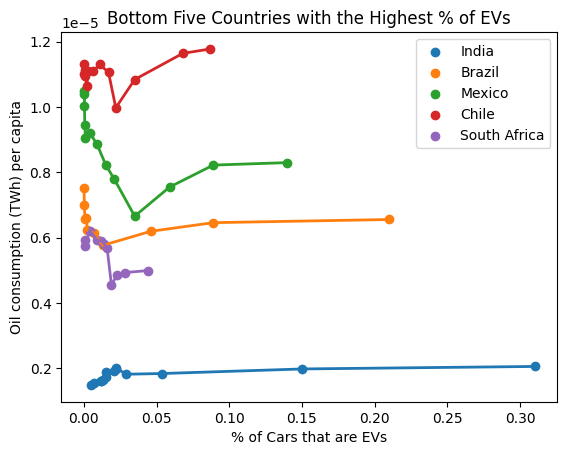

In [22]:
# Creating a scatter plot to visualize the relationship between the percentage of electric vehicles and oil consumption per capita for selected countries
fig, ax = plt.subplots()

# Extracting EV percentages for the selected countries
india = merged_df.loc[merged_df['Country']=='India']['% of Cars that are EVs']
brazil = merged_df.loc[merged_df['Country']=='Brazil']['% of Cars that are EVs']
mexico = merged_df.loc[merged_df['Country']=='Mexico']['% of Cars that are EVs']
chile = merged_df.loc[merged_df['Country']=='Chile']['% of Cars that are EVs']
south_africa = merged_df.loc[merged_df['Country']=='South Africa']['% of Cars that are EVs']

# Plotting scatter points for each country based on their EV percentage and oil consumption per capita
plt.scatter(india, merged_df.loc[merged_df['Country']=='India']['Oil Consumption Per Capita'], label = 'India')
plt.scatter(brazil, merged_df.loc[merged_df['Country']=='Brazil']['Oil Consumption Per Capita'], label = 'Brazil')
plt.scatter(mexico, merged_df.loc[merged_df['Country']=='Mexico']['Oil Consumption Per Capita'], label ='Mexico')
plt.scatter(chile, merged_df.loc[merged_df['Country']=='Chile']['Oil Consumption Per Capita'], label = 'Chile')
plt.scatter(south_africa, merged_df.loc[merged_df['Country']=='South Africa']['Oil Consumption Per Capita'], label = 'South Africa')

# Plotting lines to connect points for each country to show trends
plt.plot(india, merged_df.loc[merged_df['Country']=='India']['Oil Consumption Per Capita'], linewidth=2)
plt.plot(brazil, merged_df.loc[merged_df['Country']=='Brazil']['Oil Consumption Per Capita'], linewidth=2)
plt.plot(mexico, merged_df.loc[merged_df['Country']=='Mexico']['Oil Consumption Per Capita'], linewidth=2)
plt.plot(chile, merged_df.loc[merged_df['Country']=='Chile']['Oil Consumption Per Capita'],linewidth=2)
plt.plot(south_africa, merged_df.loc[merged_df['Country']=='South Africa']['Oil Consumption Per Capita'], linewidth=2)

# Setting labels and title for the plot
plt.legend(loc='best')
plt.xlabel('% of Cars that are EVs')
plt.ylabel('Oil consumption (TWh) per capita')
plt.title('Bottom Five Countries with the Highest % of EVs')

plt.show()

## Forcasting to predict EV global development

In [ ]:
# Forcast the future of the ev dataframe
ev_new = ev_df.reset_index(drop = False)
ev_new.head()

,Year,Country,% of Cars that are EVs
0,2011,Australia,0.00039
1,2012,Australia,0.00240
2,2013,Australia,0.00460
3,2014,Australia,0.01400
4,2015,Australia,0.02700


In [ ]:
# Removing the 'Country' column from the ev_new DataFrame
del ev_new['Country']

# Converting the 'Year' column to datetime format
ev_new['Year'] = pd.to_datetime(ev_new['Year'], format='%Y')
ev_new.head()

,Year,% of Cars that are EVs
0,2011-01-01,0.00039
1,2012-01-01,0.00240
2,2013-01-01,0.00460
3,2014-01-01,0.01400
4,2015-01-01,0.02700


In [ ]:
# Renaming the columns of the ev_new DataFrame for Prophet Model
ev_new.columns = ['ds', 'y']
ev_new

,ds,y
0,2011-01-01,0.00039
1,2012-01-01,0.00240
2,2013-01-01,0.00460
3,2014-01-01,0.01400
4,2015-01-01,0.02700
...,...,...
433,2019-01-01,0.62000
434,2020-01-01,0.77000
435,2021-01-01,0.95000
436,2022-01-01,1.30000


In [ ]:
# Creates Prophet model
model = Prophet()

model.fit(ev_new)

# Forecast future 5 years
future = model.make_future_dataframe(periods=5, freq='Y')

forecast = model.predict(future)
forecast.tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpppm8z654/o7p3ywpe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpppm8z654/tall0y47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40147', 'data', 'file=/tmp/tmpppm8z654/o7p3ywpe.json', 'init=/tmp/tmpppm8z654/tall0y47.json', 'output', 'file=/tmp/tmpppm8z654/prophet_modelhw9hhhaa/prophet_model-20241006171010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
14,2023-12-31,5.205233,1.691276,8.295239,5.184201,5.223067,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,0.0,0.0,0.0,4.966680
15,2024-12-31,5.964539,2.356933,9.048257,5.897410,6.021962,-0.264930,-0.264930,-0.264930,-0.264930,-0.264930,-0.264930,0.0,0.0,0.0,5.699609
16,2025-12-31,6.721770,3.191769,9.738979,6.597976,6.834083,-0.256266,-0.256266,-0.256266,-0.256266,-0.256266,-0.256266,0.0,0.0,0.0,6.465504
17,2026-12-31,7.479001,3.990135,10.712965,7.278299,7.661687,-0.247470,-0.247470,-0.247470,-0.247470,-0.247470,-0.247470,0.0,0.0,0.0,7.231531
18,2027-12-31,8.236232,4.495795,11.288661,7.958480,8.495283,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,-0.238554,0.0,0.0,0.0,7.997679


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


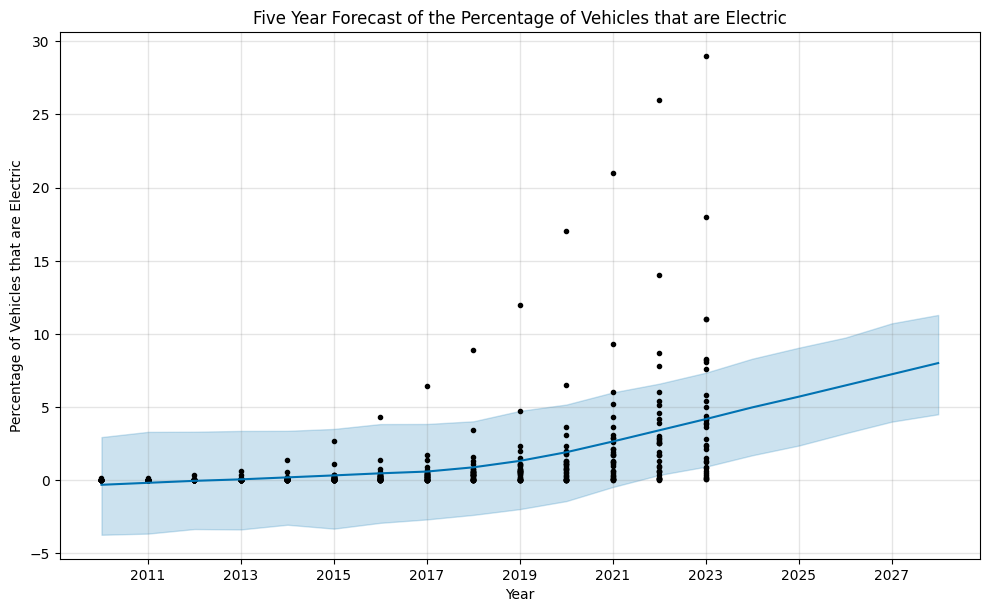

In [ ]:
# Plots the forecast
model.plot(forecast)
plt.title('Five Year Forecast of the Percentage of Vehicles that are Electric')
plt.xlabel('Year')
plt.ylabel('Percentage of Vehicles that are Electric')
plt.show()

## Forcasting of Gas Consumption globally

In [ ]:
# Reset index and rename columns for Prophet
oil_con_df = oil_con_df.reset_index()
oil_con_df = oil_con_df[['Year', 'Oil consumption - TWh']].rename(columns={'Year': 'ds', 'Oil consumption - TWh': 'y'})

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpppm8z654/_1cg80mo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpppm8z654/a1k1jysz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69712', 'data', 'file=/tmp/tmpppm8z654/_1cg80mo.json', 'init=/tmp/tmpppm8z654/a1k1jysz.json', 'output', 'file=/tmp/tmpppm8z654/prophet_modelnktd7ifg/prophet_model-20241006171031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

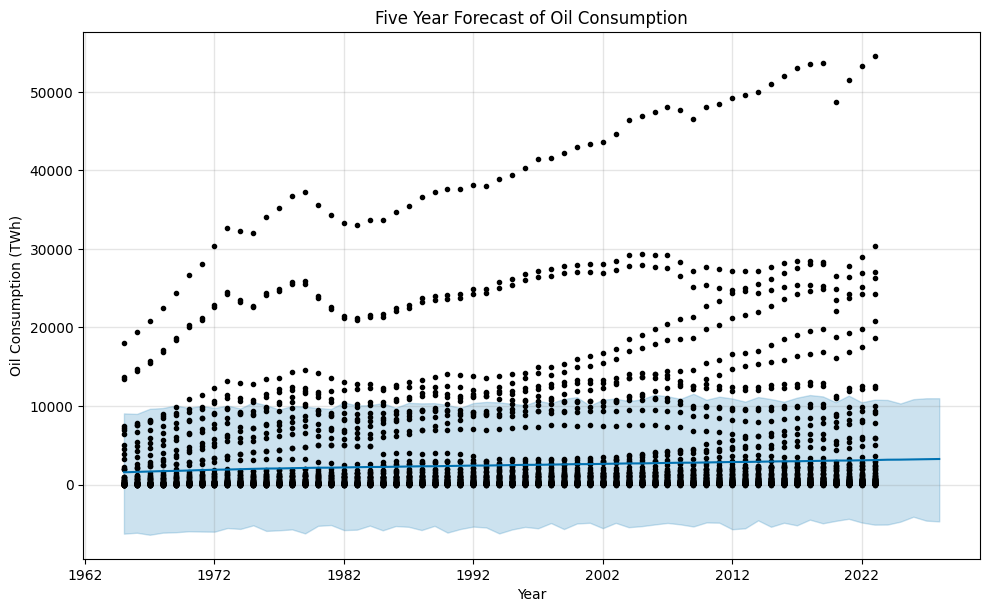

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

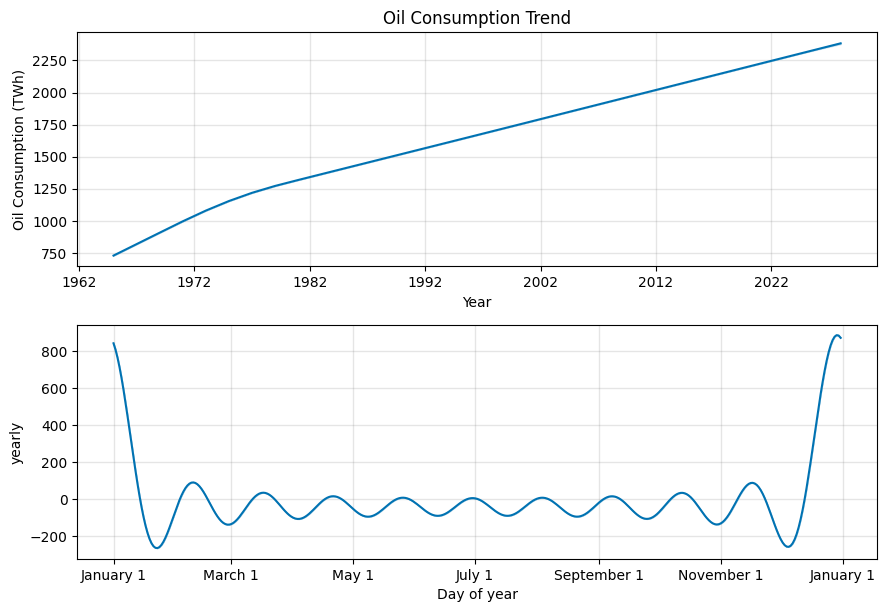

In [ ]:
# Convert 'ds' (Year) column to datetime format
oil_con_df['ds'] = pd.to_datetime(oil_con_df['ds'], format='%Y')

# Initialize Prophet model
model = Prophet()

# Fit the model with the data
model.fit(oil_con_df)

# Create a future DataFrame for the next 5 years
future = model.make_future_dataframe(periods=5, freq='Y')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Five Year Forecast of Oil Consumption')
plt.xlabel('Year')
plt.ylabel('Oil Consumption (TWh)')
plt.show()

# Plot forecast components (trend, seasonality)
fig = model.plot_components(forecast)
fig.get_children()[1].set_xlabel('Year')
fig.get_children()[1].set_ylabel('Oil Consumption (TWh)')
fig.get_children()[1].set_title('Oil Consumption Trend')
fig.show()